# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Rionando Soeksin Putra
- Email: rionandosoeksin@gmail.com
- Username Dicoding: rio_oir
- Dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

## Menentukan Pertanyaan Bisnis

1. Apa jenis product yang paling banyak dan sedikit terjual?
2. Apa jenis product terbaik dari segi review?
3. Total revenue selama beberapa bulan terakhir?
4. Bagaimana Demografi Pembeli?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Menyaipkan semua library yang dibuthkan

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [517]:
customer_df = pd.read_csv('customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [518]:
geolocation_df = pd.read_csv('geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [519]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [520]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [521]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [522]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [523]:
product_category_name_df = pd.read_csv('product_category_name_translation.csv')
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [524]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [525]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Customer_df

In [526]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Tidak ada keanehan dengan data di atas. Semua data sudah memiliki tipe data yang tepat.

In [527]:
# Menghitung jumlah missing values
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Tidak ada ` missing value` dari data di atas.

In [528]:
# Menhitung total duplikasi data
print(f'Jumlah duplikasi: {customer_df.duplicated().sum()}')

Jumlah duplikasi: 0


Tidak ada data yang duplikat

In [529]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Saya mengira zipcode dengan nilai `99990` adalah sebuah kesalahan. Tetapi zipcode dengan nilai tersebut benar adanya.

In [530]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
40219,1a4afc7f367d41bd2edb6fb7f6e7dc8c,ea45fdfe8aaa3f81604b23a652c49fcf,71596,brasilia,DF
3151,154b6ed9a731645fee1a751fea80076c,09ce6072ee896c89c6e24757c777f89d,20940,rio de janeiro,RJ
21550,836df37ad1fc6e991443fabe4783ae5d,31a0924f318661d053477b0e7870298c,75906,rio verde,GO
77715,1fb551cd3778f86a2ba7f008cc6165a7,f2fe7157d67e049cd5d0df9736226a12,17018,bauru,SP
87569,14f48ad16762cbf2cd2fbd4d0e8c9ffc,10b442e762ba8a5ad22de5ba2207e5f1,3613,sao paulo,SP


#### order_items_df

In [531]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [532]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Tidak ada yang aneh dari data di atas, ada kesalahan tipe data di `shipping_limit_date`. Tapi, sepertinya kita tidak akan menggunakan kolom tersebut untuk analisis apapun

In [533]:
# Menghitung jumlah missing values
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak ada `missing value` dari data di atas

In [534]:
# Menghitung tota duplikasi data
print(f'Jumlah duplikasi: {order_items_df.duplicated().sum()}')

Jumlah duplikasi: 0


Tidak ada duplikasi

In [535]:
# Menampilkan parameter statistik
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Tidak ada keanehan dari parameter statistik di atas

#### order_payments_df

In [536]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [537]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tidak ada yang aneh dengan data di atas.

In [538]:
# Menghitung total missing values
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Tidak ada `missing value` pada di atas

In [539]:
# Menghitung total duplikasi data
print(f'Jumlah duplikasi: {order_payments_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [540]:
# Menampilkan parameter statistik
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Tidak ada yang aneh dari data di atas

#### order_reviews_df

In [541]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [542]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Tidak keanehan apapun dari data di atas. Semua tipe sudah benar. Ada beberapa kolom yang kosong seperti `review_comment_title` dan `review_comment_message`. Hal ini mungkin karena tidak semua yang memberikan review berupa skor (1-5) akan meninggalkan review tertulis juga.

In [543]:
# Menghitung total missing values
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Seperti penjelasan saya di atas, tidak semua yang meninggalkan review berupa `review_score` akan meninggalkan komentar tertulis berupa `review_comment_title` dan `review_comment_message`

In [544]:
# Menghitung total duplikasi data
print(f'Jumlah duplikasi data: {order_reviews_df.duplicated().sum()}')

Jumlah duplikasi data: 0


In [545]:
# Menampilkan parameter statistik
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### orders_df

In [546]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [547]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


kesalahan tipe data di bagian `order_delivered_carrier_date`, `order_delivered_customer_date`,
`order_purchase_timestamp`, dan
`order_approved_at` yang berupa `object` yang seharusnya `datetime`

In [548]:
# Menghitung total missing values
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terdapat beberapa kolom yang memiliki missing values, tapi kita tidak akan menggunakan itu untuk menjawab pertanyaan bisnis kita.

In [549]:
# Menghitung total duplikasi data
print(f'Jumlah duplikasi: {orders_df.duplicated().sum()}')

Jumlah duplikasi: 0


In [550]:
# Menampilkan parameter statistik
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### product_category_name_df

In [551]:
product_category_name_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


#### products_df

In [552]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [553]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [554]:
# Menhitung total missing values
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat beberapa kolom yang memiliki missing values

In [555]:
# Menghitung duplikat data
print(f'Jumlah duplikasi: {products_df.duplicated().sum()}')

Jumlah duplikasi: 0


#### sellers_df

In [556]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [557]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [558]:
# Menghitung total missing values
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [559]:
# Menghitung total duplikasi data
print(f'Jumlah duplikasi: {sellers_df.duplicated().sum()}')

Jumlah duplikasi: 0


### Cleaning Data

Kesalahan yang diperoleh saat assesing data adalah:
1. pada orders_df terdapat kesalahan tipe data di bagian `order_delivered_carrier_date`, `order_delivered_customer_date`,
`order_purchase_timestamp`, dan
`order_approved_at` yang berupa `object` yang seharusnya `datetime`
2. pada products_df, Terdapat beberapa kolom yang memiliki missing values (e.g. `product_category_name `)
3. Terdapat nilai null pada kolom `order_approved_at` yang menyebabkannya dianggap sebagai nilai float. Sehingga, tidak bisa digunaka untuk analisis RFM.

#### Cleaning data yang pertama

In [560]:
# Memanggil kolom yang ingin diubah
datetime_columns = ['order_estimated_delivery_date','order_delivered_carrier_date', 'order_delivered_customer_date', 'order_approved_at', 'order_purchase_timestamp']

# mengubah semua kolom yang telah dipanggil sebelumnya menjadi tipe data datetime
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [561]:
# Mengubah format waktu pada order_approved_at
orders_df['order_approved_at'] = orders_df['order_approved_at'].dt.strftime('%Y-%m-%d')
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])

In [562]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Cleaning data yang kedua

In [563]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [564]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tidak terlalu banyak informasi penting, jadi lebih baik kita hapus saja.

In [565]:
products_df.dropna(inplace=True)

In [566]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Cleaning data yang ketiga

In [567]:
# Mengisi missing values di 'order_approved_at' dengan the tanggal paling awal
min_date = orders_df['order_approved_at'].min()
orders_df['order_approved_at'].fillna(min_date, inplace=True)
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore customer_df

In [568]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [569]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [570]:
# Demografi berdasarkan tempat tinggal (kota)
customer_df.groupby('customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [571]:
# Total kota di Brazil
print(f'Total kota di Brazil pada dataset ini adalah sebanyak {customer_df.customer_city.nunique()}')

Total kota di Brazil pada dataset ini adalah sebanyak 4119


Mayoritas pembeli berasal dari kota `Sao Paulo` dan `Rio de Janeiro`

In [572]:
# Demografi berdasarkan state
customer_df.groupby('customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Sebagian besar customer berasal dari state `SP` atau `Sau Paulo`

### Explore order_items_df

In [573]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [574]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Pembelian dengan nilai terkecil adalah sebesar `R$ 0.85` dan yang paling besar adalah sebesar `R$ 6735`

### Explore order_payments_df

In [575]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [576]:
order_payments_df.groupby('payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

Mayoritas pembeli membayar menggunakan `credit_card`

### Explore order_reviews_df

In [577]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [578]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Dilihat dari `mean` `review_score` yang sebesar `4.086` dan `standar deviasi` sebesar `1.347`, kita bisa mengetahui bahwa rata rata pengguna sudah puas dengan barang yang mereka beli

In [579]:
order_reviews_df.groupby('review_score').order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

Bisa dilihat di atas, mayoritas pengguna sudah puas dengan barang yang mereka beli

In [580]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Explore sellers_df

In [581]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [582]:
# Demografi penjual berdasarkan kota
sellers_df.groupby('seller_city').seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [583]:
# Demografi penjual berdasarkan state
sellers_df.groupby('seller_state').seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Explore products_df dan order_items_df

In [584]:
product_count_df = pd.merge(
    left = order_items_df,
    right = products_df,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)

product_count_english_df = pd.merge(
    left = product_count_df,
    right = product_category_name_df,
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)

product_count_english_df.rename(columns={
    'order_id': 'total_order'
}, inplace=True)

product_count_english_df.groupby('product_category_name_english').total_order.nunique().sort_values(ascending=False).reset_index()

,product_category_name_english,total_order
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
...,...,...
66,arts_and_craftmanship,23
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8


5 produk tersukses adalah:
1. `bed_bath_table`
2. `health_beauty`
2. `sports_leisure`
2. `computers_accessories`
2. `furniture_decor`

### Explore order_payments_df dan orders_df

In [585]:
total_revenue_df = pd.merge(
    left = orders_df,
    right = order_payments_df,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
total_revenue_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


In [586]:
revenue_by_day_df = total_revenue_df.groupby('order_approved_at').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
})
revenue_by_day_df.rename(columns={
    'order_id': 'total_order',
    'payment_value': 'total_revenue'
}, inplace=True)

revenue_by_day_df.reset_index(inplace=True)
revenue_by_day_df['order_approved_at'] = pd.to_datetime(revenue_by_day_df['order_approved_at'])

# Membersihkan terakhir karena hanya terjadi 1 transaksi pada bulan tersebut
last_month = revenue_by_day_df['order_approved_at'].max()
months_to_remove = (revenue_by_day_df['order_approved_at'] == last_month)
revenue_by_day_df = revenue_by_day_df[~months_to_remove]

revenue_by_day_df

,order_approved_at,total_order,total_revenue
0,2016-09-15,161,37129.77
1,2016-10-04,20,2877.21
2,2016-10-05,11,2356.44
3,2016-10-06,110,20145.72
4,2016-10-07,59,12185.05
...,...,...,...
605,2018-08-25,81,10510.08
606,2018-08-26,70,11478.95
607,2018-08-27,64,6447.78
608,2018-08-28,56,5738.28


### Explore order_reviews_df, order_items_df, dan products_df

In [587]:
order_items_reviews_df = pd.merge(
    left = order_reviews_df,
    right = order_items_df,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)

In [588]:
items_in_english_df = pd.merge(
    left = products_df,
    right = product_category_name_df,
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)

In [589]:
order_items_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


In [590]:
items_in_english_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [591]:
review_df = pd.merge(
    left = order_items_reviews_df,
    right = items_in_english_df,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)

In [592]:
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools


In [593]:
review_count_df = review_df.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'review_score': 'mean'
}, inplace=True)

review_count_df.rename(columns={
    'order_id': 'total_order',
    'review_score': 'mean_review_score'
}, inplace=True)

In [610]:
review_count_df.sort_values(by='mean_review_score', ascending=False).head()

,total_order,mean_review_score
product_category_name_english,,
cds_dvds_musicals,12,4.642857
fashion_childrens_clothes,8,4.500000
books_general_interest,508,4.446266
costruction_tools_tools,94,4.444444
flowers,28,4.419355


Dari data di atas, diperoleh bahwa item terbaik dari segi review adalah
1. `agro_industry_and_commerce`
2. `air_conditioning`
3.  `art`
4. `arts_and_craftmanship`
5. `audio`

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa jenis product yang paling banyak dan sedikit terjual?



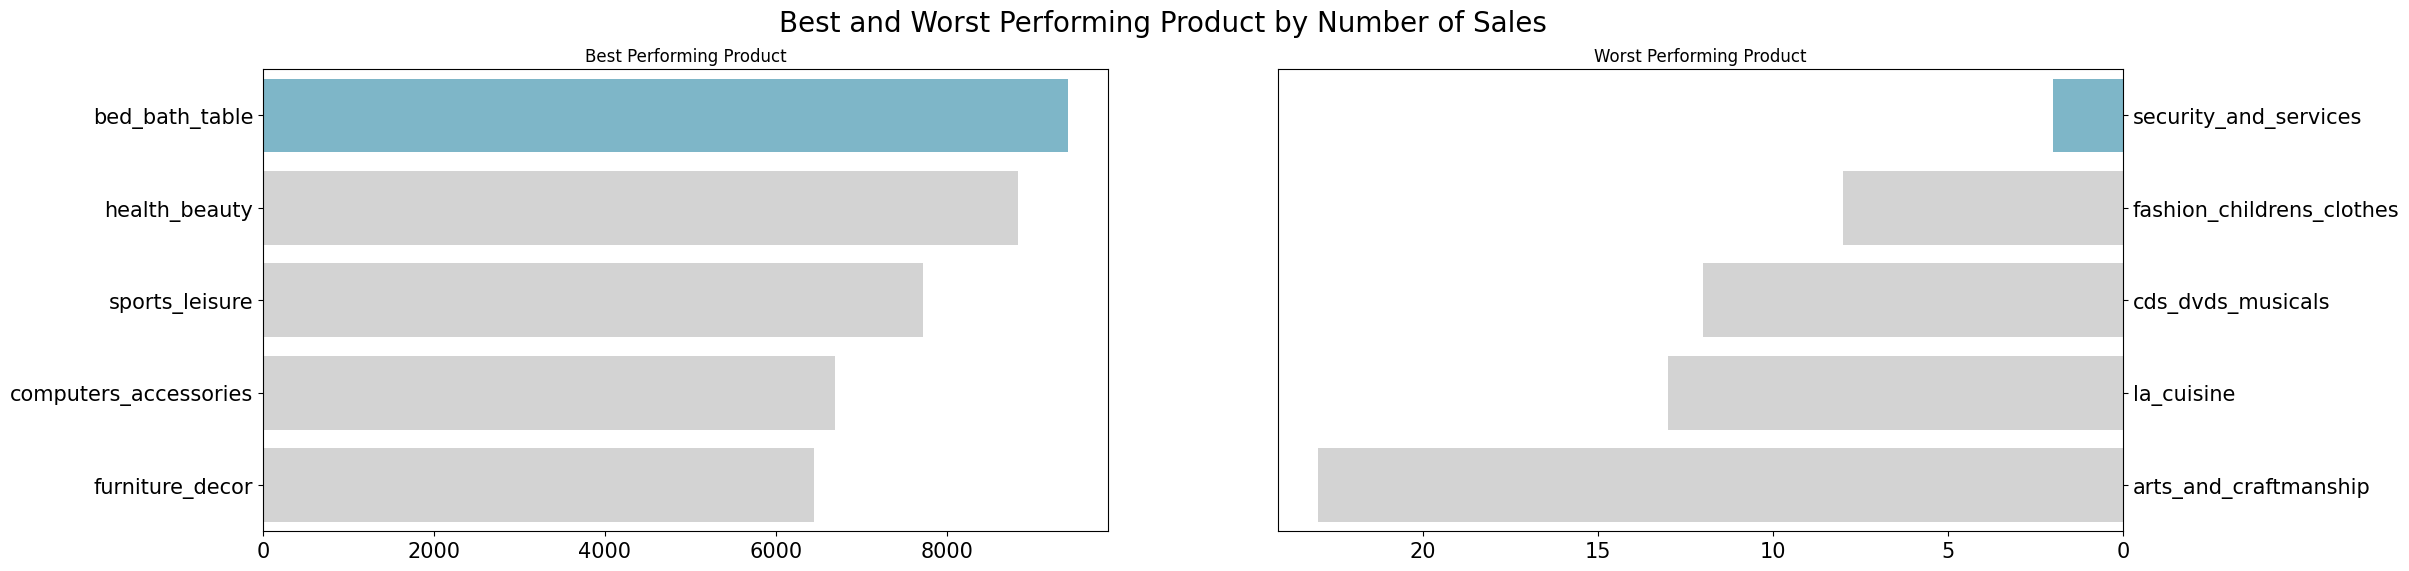

In [595]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='total_order', y='product_category_name_english', data=product_count_english_df.groupby('product_category_name_english').total_order.nunique().sort_values(ascending=False).reset_index().head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Best Performing Product')
ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(x='total_order', y='product_category_name_english', data=product_count_english_df.groupby('product_category_name_english').total_order.nunique().sort_values(ascending=True).reset_index().head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].set_title('Worst Performing Product')
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle('Best and Worst Performing Product by Number of Sales', fontsize=20)
plt.show()

Product terbaik kita dari segi penjualan adalah:
1. bed_bath_table
2. health_beauty
3. sports_leisure
4. computers_accessories
5. furniture_decor

Sedangkan 5 terburuk dari segi penjualan adalah:
1. security_and_services
2. fashion_childrens_clothes
3. cds_dvds_musicals
4. la_cuisine
5. arts_and_craftmanship

### Pertanyaan 2: Apa jenis product terbaik dari segi review?

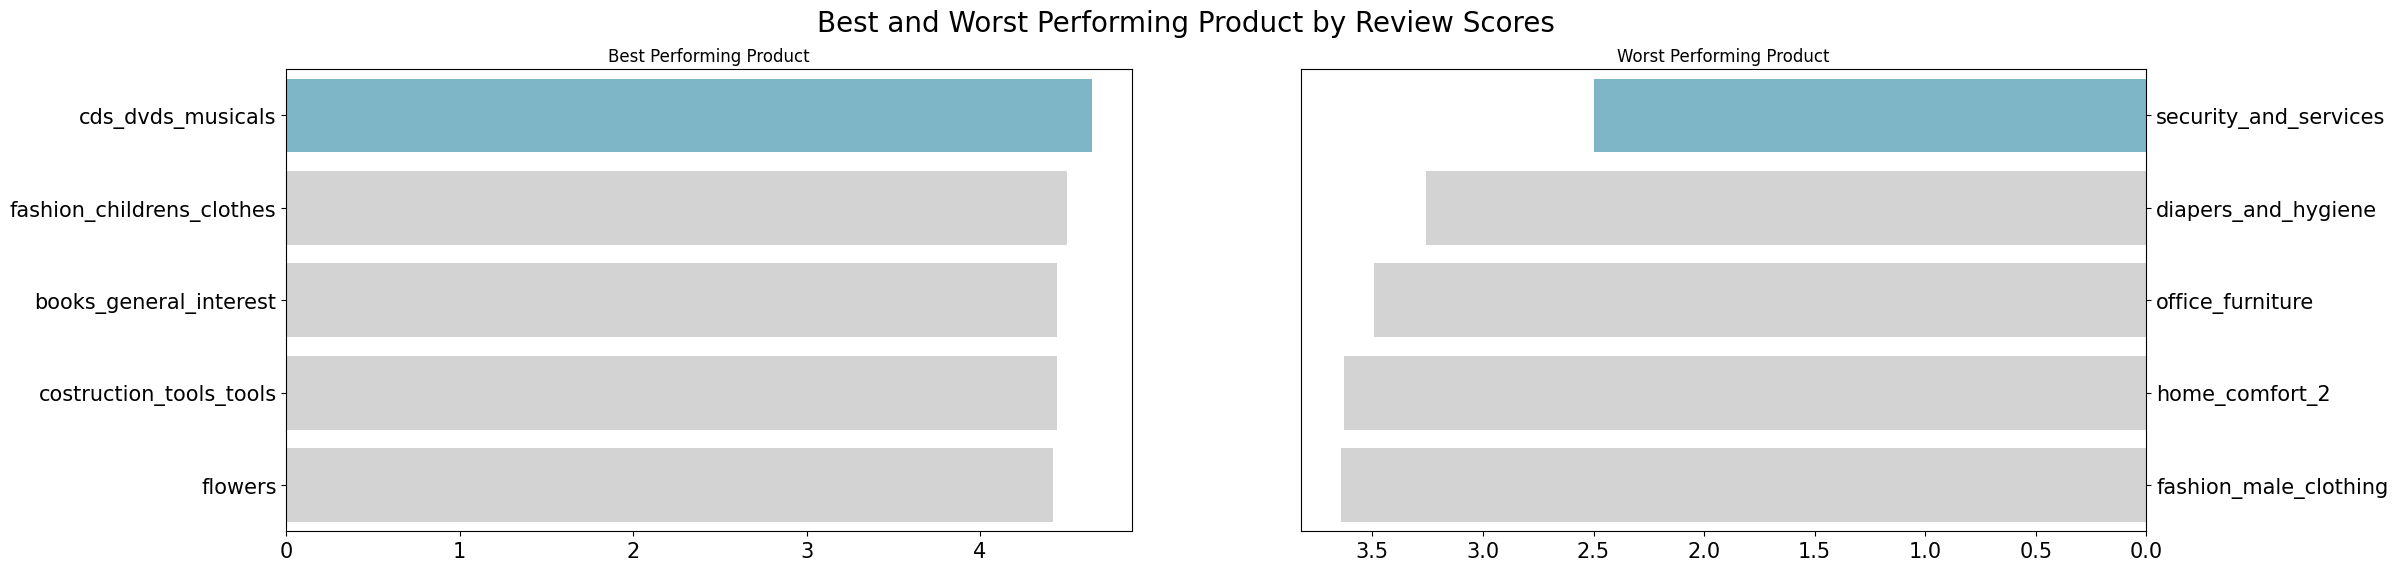

In [596]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='mean_review_score', y='product_category_name_english', data=review_count_df.reset_index().sort_values(by='mean_review_score', ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Best Performing Product')
ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(x='mean_review_score', y='product_category_name_english', data=review_count_df.reset_index().sort_values(by='mean_review_score', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].set_title('Worst Performing Product')
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle('Best and Worst Performing Product by Review Scores', fontsize=20)
plt.show()

### Pertanyaan 3: Total revenue selama beberapa bulan terakhir?

In [597]:
monthly_revenue_df = revenue_by_day_df.resample(rule='M', on='order_approved_at').agg({
    'total_order': 'sum',
    'total_revenue': 'sum'
})
monthly_revenue_df.index = monthly_revenue_df.index.strftime('%Y-%m')
monthly_revenue_df = monthly_revenue_df.reset_index()

# Menghapus bulan terakhir karena hanya ada data sampai tanggal 3, bukan sampai hari terakhir
monthly_revenue_df = monthly_revenue_df[monthly_revenue_df['order_approved_at'] != monthly_revenue_df['order_approved_at'].max()]

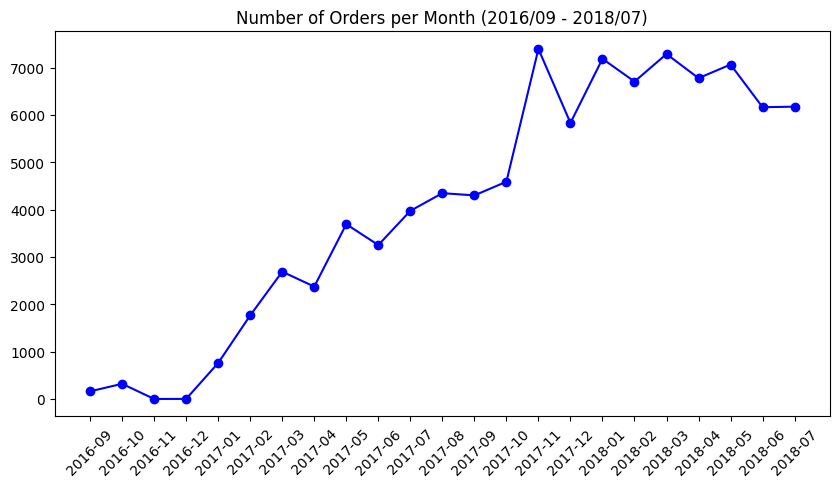

In [605]:
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue_df['order_approved_at'], monthly_revenue_df['total_order'], marker='o', color='b')
plt.title('Number of Orders per Month (2016/09 - 2018/07)')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

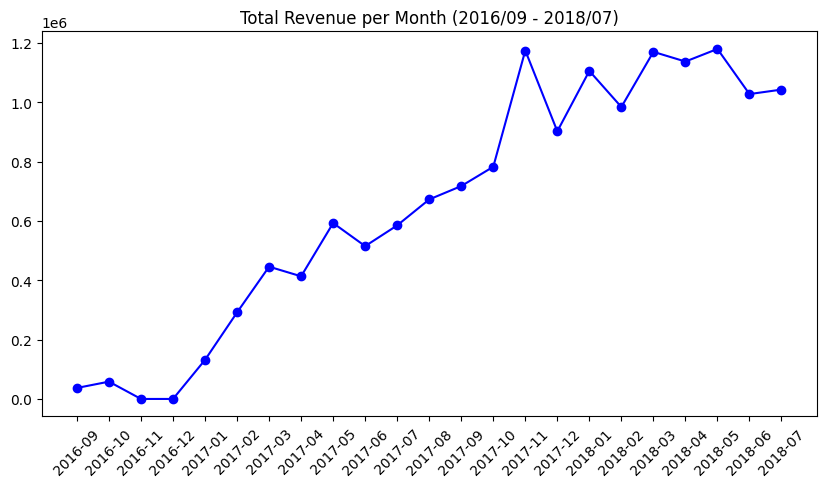

In [606]:
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue_df['order_approved_at'], monthly_revenue_df['total_revenue'], marker='o', color='b')
plt.title('Total Revenue per Month (2016/09 - 2018/07)')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Dari visualisasi di atas, kita dapat belajar bahwa Total Revenue itu berbanding lurus dengan total orders pada bulan itu. Jadi ketika total orders naik, maka total revenua juga akan naik

### Pertanyaan 4: Bagaimana Demografi Pembeli?

Karena brazil memiliki banyak kota (4000+), rasanya akan kurang efisien jika memvisualisasikan demografi pelanggan per kota. Jadinya, saya akan visualisasikan per `state` saja.

In [600]:
customer_state_df = customer_df.groupby('customer_state').customer_id.nunique().sort_values(ascending=False).reset_index()
customer_state_df = customer_state_df.rename(columns={
    'customer_id': 'total_customer'
})

In [601]:
customer_state_df

,customer_state,total_customer
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


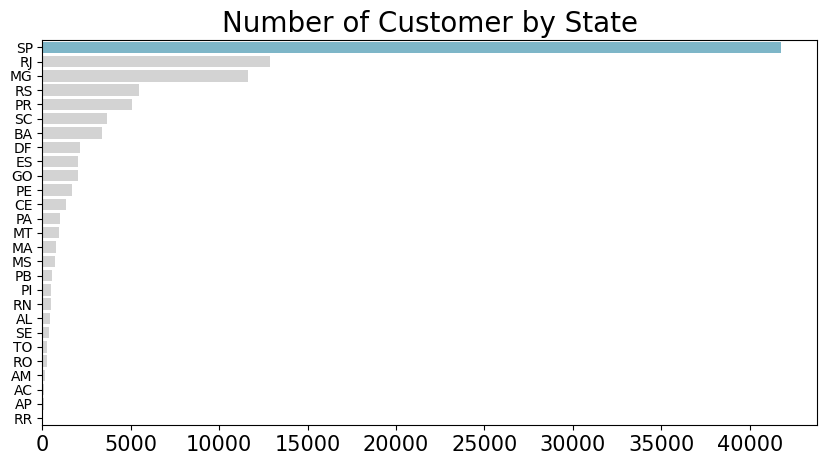

In [602]:
fig, ax = plt.subplots(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='total_customer', y='customer_state', data=customer_state_df, palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Number of Customer by State', fontsize=20)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=15)

Dari data di atas kita bisa menarik kesimpulan bahwa mayoritas pembeli berasal dari state `Sao Paulo (SP)`

### RFM Analysis untuk menjawab pertanyaan nomor 5, 6, dan 7

In [603]:
customer_all_order_df = pd.merge(
    left = total_revenue_df,
    right = customer_df,
    how = 'left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)

customer_all_order_df.head()
rfm_df = customer_all_order_df.groupby(by='customer_id', as_index=False).agg({
    'order_approved_at': 'max',
    'order_id': 'nunique',
    'payment_value': 'sum'
})

# Mengubah tipe data 'order_approved_at' dari object menjadi datetime
rfm_df['order_approved_at'] = pd.to_datetime(rfm_df['order_approved_at'])

In [608]:
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_df['order_approved_at'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,382
4,000379cdec625522490c315e70c7a9fb,1,107.01,152


In [614]:
rfm_df.sort_values(by='frequency', ascending=False).head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
66279,aa62a16b10e3fb24ecdefd7e4dc3fa65,1,206.56,71
66301,aa738cdb72af39e38482fa25b992c67c,1,76.86,174
66300,aa7210736aad65a84e964cfa8d64aa66,1,141.90,158
66299,aa72002446dfbac0691304465c1b982d,1,20.95,566


In [615]:
rfm_df.sort_values(by='monetary', ascending=False).head()

,customer_id,frequency,monetary,recency
8546,1617b1357756262bfa56ab541c47bc16,1,13664.08,336
91985,ec5b2ba62e574342386871631fafd3fc,1,7274.88,48
77522,c6e2731c5b391845f6800c97401a43a9,1,6929.31,568
95124,f48d464a0baaea338cb25f816991ab1f,1,6922.21,38
24771,3fd6777bbce08a352fddd04e4a7cc8f6,1,6726.66,465


In [616]:
rfm_df.sort_values(by='recency', ascending=False).head()

,customer_id,frequency,monetary,recency
15250,2737211835d5ea370af15ee145f7840c,1,69.46,718
94495,f2cc41062fa1cdfd6475afc3aaf9909f,1,51.75,718
23096,3b5cb25012ce1400dbf62ed0995e1c14,1,34.83,718
6009,0fa12cb295663a40f53876e73aa7c460,1,107.13,718
58265,9629cd856821f7cffff6f6238d5cb5e7,1,73.34,718


In [624]:
print(f"Mode of frequency: {rfm_df['frequency'].mode()[0]}")

Mode of frequency: 1


In [625]:
print(f"Mean of monetary: {rfm_df['monetary'].mean()}")

Mean of monetary: 160.98864774087147


In [626]:
print(f"Mean of recency: {rfm_df['recency'].mean()}")

Mean of recency: 246.53719290835772


## Conclusion

Pertanyaan:
1. Apa jenis product yang paling banyak dan sedikit terjual?
2. Apa jenis product terbaik dari segi review?
3. Bagaimana revenue selama beberapa bulan terakhir?
4. Bagaimana Demografi Pembeli?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

Jawaban:
1. Product terbaik kita dari segi penjualan adalah:
  1. bed_bath_table
  2. health_beauty
  3. sports_leisure
  4. computers_accessories
  5. furniture_decor

  Sedangkan 5 terburuk dari segi penjualan adalah:
  1. security_and_services
  2. fashion_childrens_clothes
  3. cds_dvds_musicals
  4. la_cuisine
  5. arts_and_craftmanship

2. Dari Segi review, barang terbaik adalah `cds_dvds_musicals` sedangkan yang terburuk adalah `security_and_services`

3. Revenue selama beberapa terakhir sangat baik, terdapat peningkatan yang signifikan dari `2017/10` ke `2017/11`

4. Mayoritas pembeli berasal dari `Sao Paulo`

5. Berdasarkan RFM analysis yang telah dilakukan, rata-rata pelanggan terakhir kali melakukan transaksi adalah sekitar `246 hari` yang lalu

6. Berdasarkan RFM analysis yang telah dilakukan, kebanyakan pelanggan hanya melakukan `1 kali`

7. Berdasarkan RFM analysis yang telah dilakukan, rata-rata uang yang dihabiskan pelanggan adalah sebesar `R$ 160.98`